In [2]:
%pip install numpy opencv-python matplotlib

import cv2
import numpy as np
from matplotlib import pyplot as plt


  Using cached matplotlib-3.9.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.2.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 8.3 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pillow-10.3.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.0-cp311-cp311-macosx_11_0_arm64.whl (7.8 MB)
Using cached contourpy-1.2.1-cp311-cp311-macosx_11_0_arm64.whl (245 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.3 MB/s eta 0:00:0000:0100:01
Using cached kiwisolver-1.4.5-cp311-cp311-macosx_11_0_arm64.whl (66 kB)
Using cached pillow-10.3.0-cp311-cp311-macosx_11_0_arm64.whl (3.4 MB)
Using cached pyparsing-3.1.2-py

In [24]:


def identify_rgb_circles(image_path):
    # Load the image
    img = cv2.imread(image_path)
    if img is None:
        print("Error loading image")
        return

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # lower_blue = np.array([110,50,50])
    # upper_blue = np.array([130,255,255])
    lower_blue = np.array([100, 50, 50])
    upper_blue = np.array([140, 255, 255])
    lower_red = np.array([0,50,50])
    upper_red = np.array([35,255,255])
    lower_green = np.array([40,50,50])
    upper_green = np.array([100,255,255])

    mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
    mask_red = cv2.inRange(hsv, lower_red, upper_red)
    mask_green = cv2.inRange(hsv, lower_green, upper_green)

    res_blue = cv2.bitwise_and(img,img, mask=mask_blue)
    res_red = cv2.bitwise_and(img,img, mask=mask_red)
    res_green = cv2.bitwise_and(img,img, mask=mask_green)

    gray_blue = cv2.cvtColor(res_blue, cv2.COLOR_BGR2GRAY)
    gray_red = cv2.cvtColor(res_red, cv2.COLOR_BGR2GRAY)
    gray_green = cv2.cvtColor(res_green, cv2.COLOR_BGR2GRAY)

    _,thresh_blue = cv2.threshold(gray_blue,10,255,cv2.THRESH_BINARY)
    _,thresh_red = cv2.threshold(gray_red,10,255,cv2.THRESH_BINARY)
    _,thresh_green = cv2.threshold(gray_green,10,255,cv2.THRESH_BINARY)

    # Find contours
    contours_blue, _ = cv2.findContours(thresh_blue, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours_red, _ = cv2.findContours(thresh_red, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours_green, _ = cv2.findContours(thresh_green, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for c in contours_red:
        size = cv2.contourArea(c)
        if size > 30:
            cXY_left = tuple(c[c[:, :, 0].argmin()][0])
            cXY_top = tuple(c[c[:, :, 1].argmin()][0])
            cX = cXY_left[0]
            cY = cXY_top[1]
            # cv2.circle(img, (cX, cY), 5, (255, 0, 0), -1)

    for c in contours_blue:
        size = cv2.contourArea(c)
        if size > 30:
            cXY_left = tuple(c[c[:, :, 0].argmin()][0])
            cXY_top = tuple(c[c[:, :, 1].argmin()][0])
            cX = cXY_left[0]
            cY = cXY_top[1]
            # cv2.circle(img, (cX, cY), 5, (0, 0, 255), -1)
            
    for c in contours_green:
        size = cv2.contourArea(c)
        if size > 30:
            cXY_left = tuple(c[c[:, :, 0].argmin()][0])
            cXY_top = tuple(c[c[:, :, 1].argmin()][0])
            cX = cXY_left[0]
            cY = cXY_top[1]
            # cv2.circle(img, (cX, cY), 5, (0, 255, 0), -1)

    # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # plt.title('Detected RGB Circles')
    # plt.axis('off')
    # plt.show()
    fig, axs = plt.subplots(2, 2, figsize=(8,6))

    axs[0, 0].imshow(cv2.cvtColor(res_blue, cv2.COLOR_BGR2RGB))
    axs[0, 0].set_title('Blue')
    axs[0, 0].axis('off')

    axs[0, 1].imshow(cv2.cvtColor(res_red, cv2.COLOR_BGR2RGB))
    axs[0, 1].set_title('Red')
    axs[0, 1].axis('off')

    axs[1, 0].imshow(cv2.cvtColor(res_green, cv2.COLOR_BGR2RGB))
    axs[1, 0].set_title('Green')
    axs[1, 0].axis('off')

    axs[1, 1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[1, 1].set_title('Image with Circles')
    axs[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

# # Example usage
# identify_rgb_circles("path_to_your_image.jpg")


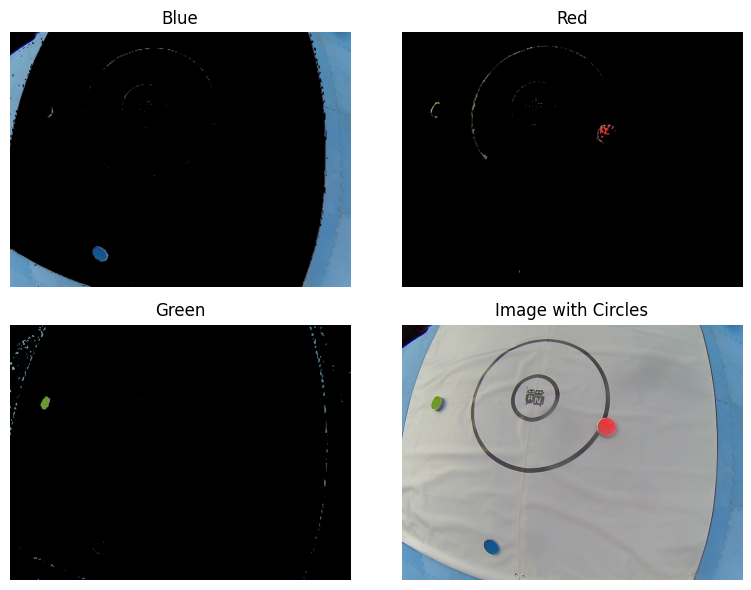

In [25]:

# Example usage
identify_rgb_circles("/path/to/test/image")